<a href="https://colab.research.google.com/github/spingram/MAT421-sam/blob/main/InterpolationHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a function my_lin_interp(x, y, X), where x and y are arrays containing experimental data points, and X is an array. Assume that x and X are in ascending order and have unique elements. The output argument, Y, should be an array, the same size as X, where Y[i] is the linear interpolation of X[i]. You should not use interp from numpy or interp1d from scipy. The function should also graph the interpolation.

In [146]:
import matplotlib.pyplot as plt
def my_lin_interp(x,y,X):
  Y = [0]*len(X)
  for i in range(0,(len(X))) :
   for j in range(0,(len(x)-1)) :
    if x[j]<= X[i] and X[i]<x[j+1] :
      Y[i]=y[j]+(((y[j+1]-y[j])*(X[i]-x[j]))/(x[j+1]-x[j]))
    if X[i]== x[len(x)-1]:
      Y[i]=y[len(x)-1]
  xgraph = np.linspace(x[0], x[len(x)-1], 100)
  ygraph = [0]*100
  for i in range(0,(len(xgraph))) :
   for j in range(0,(len(x)-1)) :
    if x[j]<= xgraph[i] and xgraph[i]<x[j+1] :
      ygraph[i]=y[j]+(((y[j+1]-y[j])*(xgraph[i]-x[j]))/(x[j+1]-x[j]))
    if xgraph[i]== x[len(x)-1]:
      ygraph[i]=y[len(x)-1]
  plt.plot(xgraph,ygraph)
  plt.scatter(x,y,color='black',label = 'original points')
  plt.scatter(X,Y,color='red', label = 'data points')
  return Y


[1.0, 2.0, 3.0, 6]


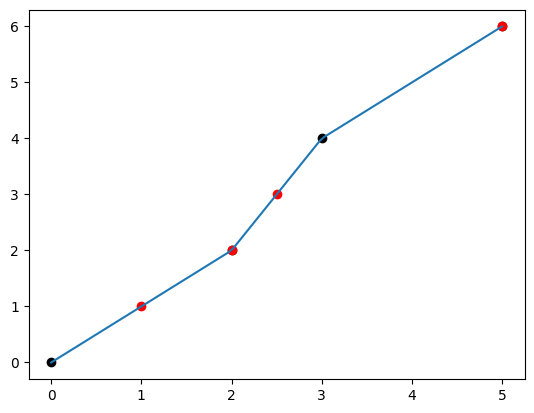

In [147]:
x = [0,2,3,5]
y = [0,2,4,6]
X = [1,2,2.5,5]
Y= my_lin_interp(x,y,X)
print(Y)

[7.0, 8.0, 10.0, 12.399999999999999, 13.0, 16.0]


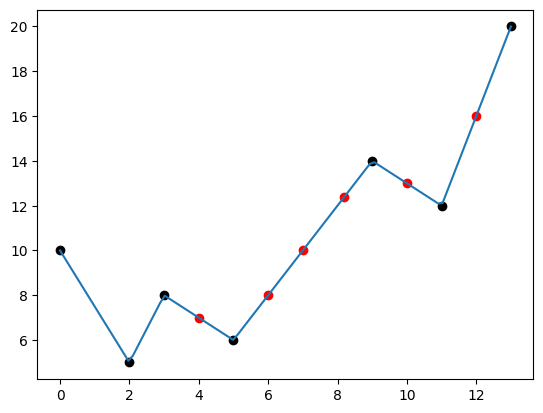

In [149]:
x = [0,2,3,5,9,11,13]
y = [10,5,8,6,14,12,20]
X = [4,6,7,8.2,10,12]
Y= my_lin_interp(x,y,X)
print(Y)

Write a function my_cubic_spline(x, y, X), where x and y are arrays containing experimental data points, and X is an array. Assume that x and X are in ascending order and have unique elements. The output argument, Y, should be an array, the same size as X, where Y[i] is cubic spline interpolation of X[i]. You may not use interp1d or CubicSpline. The function should also graph the interpolation.

In [145]:
import numpy as np
def my_cubic_spline(x,y,X):
  A = np.zeros((4*(len(x)-1),4*(len(x)-1)),dtype=int)
  b = np.zeros((4*(len(x)-1),1),dtype=int)
  currentRow = 0
  #Put in rows for first condition
  for i in range(0,len(x)-1):
    A[i,4*i] = x[i]**3
    A[i,4*i+1] = x[i]**2
    A[i,4*i+2] = x[i]
    A[i,4*i+3] = 1
    b[i]=y[i]
  currentRow= len(x)-1
   #Put in rows for second condition

  for i in range(0,len(x)-1):
    A[currentRow+i,4*i] = x[i+1]**3
    A[currentRow+i,4*i+1] = x[i+1]**2
    A[currentRow+i,4*i+2] = x[i+1]
    A[currentRow+i,4*i+3] = 1
    b[currentRow+i]=y[i+1]
  currentRow = currentRow + len(x)-1

    #Put in rows for derivtive condition
  for i in range(0,len(x)-2):
    A[currentRow+i,4*i] = 3*(x[i+1]**2)
    A[currentRow+i,4*i+1] = 2*x[i+1]
    A[currentRow+i,4*i+2] = 1
    A[currentRow+i,4*i+4] = -3*(x[i+1]**2)
    A[currentRow+i,4*i+5] = -2*x[i+1]
    A[currentRow+i,4*i+6] = -1

  currentRow = currentRow + len(x)-2


     #Put in rows for second derivtive condition
  for i in range(0,len(x)-2):
    A[currentRow+i,4*i] = 6*(x[i+1])
    A[currentRow+i,4*i+1] = 2
    A[currentRow+i,4*i+4] = -6*(x[i+1]**2)
    A[currentRow+i,4*i+5] = -2

  currentRow = currentRow + len(x)-2

    # End has second derivative zero

  A[currentRow,0]=6*x[0]
  A[currentRow,1]=2

  currentRow = currentRow +1
  A[currentRow,(4*(len(x)-1))-4]=6*x[len(x)-1]
  A[currentRow,(4*(len(x)-1))-3]=2

  A_inv = np.linalg.inv(A)

  coef = np.dot(A_inv,b)

  Y = np.zeros(len(X), dtype=float)
  for i in range(0,(len(X))) :
   for j in range(0,(len(x)-1)) :
    if x[j]<= X[i] and X[i]<x[j+1] :
      Y[i]= coef[4*j]*(X[i]**3)+coef[4*j+1]*(X[i]**2)+coef[4*j+2]*(X[i])+coef[4*j+3]

  xgraph = np.linspace(x[0], x[len(x)-1], 100)
  ygraph = np.zeros((100),dtype=float)
  for i in range(0,(len(xgraph))) :
   for j in range(0,(len(x)-1)) :
    if x[j]<= xgraph[i] and xgraph[i]<x[j+1] :
      ygraph[i]=coef[4*j]*(xgraph[i]**3)+coef[4*j+1]*(xgraph[i]**2)+coef[4*j+2]*(xgraph[i])+coef[4*j+3]
    if xgraph[i]== x[len(x)-1]:
      ygraph[i]=y[len(x)-1]
  plt.plot(xgraph,ygraph)
  plt.scatter(x,y,color='black',label = 'original points')
  plt.scatter(X,Y,color='red', label = 'data points')
  return Y



[1.      3.      2.78125]


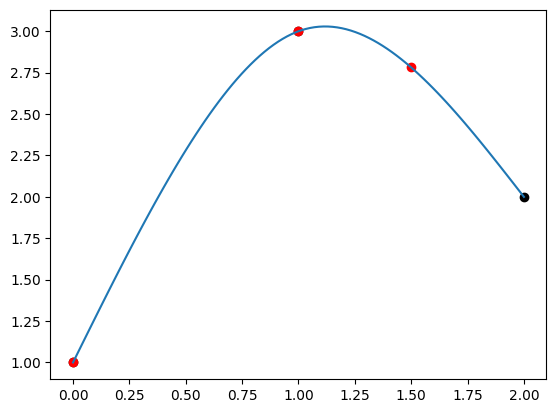

In [142]:
x=[0,1,2]
y=[1,3,2]
X = [0,1,1.5]
A=my_cubic_spline(x,y,X)
print(A)


[-0.64213107 15.21522521 19.1263196  18.47425419 10.4500255  16.02307741]


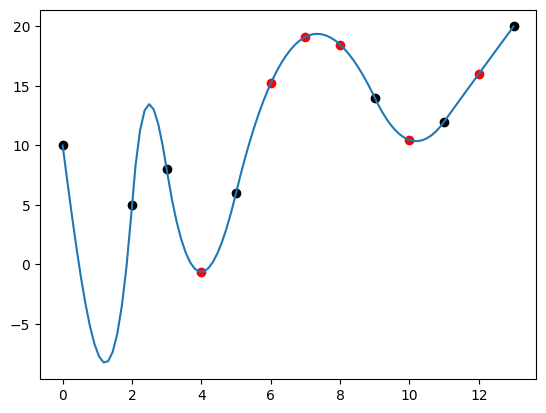

In [144]:
x = [0,2,3,5,9,11,13]
y = [10,5,8,6,14,12,20]
X = [4,6,7,8,10,12]
Y= my_cubic_spline(x,y,X)
print(Y)